In [1]:
from init import *
from helpers_analyses import *


Getting english data
Getting french data
Getting emotion words and bird names
number of overlapping words between Leuven and Rosch: 25
correlation between Leuven and Rosch ratings: (0.9519771567894879, 2.5885716906113406e-13)


In [2]:
# precompute measures
ks = [100]
t1, t2 = 9, -1
pos = NOUN

measures_emotion_eng = {}
measures_emotion_fra = {}
for k in ks:
    measures_emotion_eng[k] = nn_measure_over_words(words_eng, pos, pos_data, data, t1, t2, k)
    measures_emotion_fra[k] = nn_measure_over_words(words_fr, pos, pos_data_fr, data_fr, t1, t2, k)


In [3]:
# regression analyses
# print regression results
t_to_use = 1890

print('English emotion words')
emotion_eng_words = measures_emotion_eng[100].keys()
freqs = {w: np.log(freqs_all[w][t_to_use]) for w in emotion_eng_words}
result_eng, n_eng, pr_eng, pp_eng, pr2_eng, pp2_eng = regression_results(emotion_eng_words, measures_emotion_eng[100], proto, freqs)
print('----------------------------------------', '\n', '\n', '\n', '\n',)
print('French emotion words')
emotion_fra_words = measures_emotion_fra[100].keys()
freqs = {w: np.log(freqs_all_fr[w][t_to_use]) for w in emotion_fra_words}
result_fra, n_fra, pr_fra, pp_fra, pr2_fra, pp2_fra = regression_results(emotion_fra_words, measures_emotion_fra[100], proto_fr, freqs)
print('----------------------------------------', '\n', '\n', '\n', '\n',)


English emotion words
                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     41.35
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           2.22e-18
Time:                        23:12:28   Log-Likelihood:                 149.04
No. Observations:                 123   AIC:                            -290.1
Df Residuals:                     119   BIC:                            -278.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           

In [4]:
# precompute for figures 3c
t1, t2 = 9, 20
k = 100
nns_t1 = {
    'awe': set(get_closest_neighbours('awe', NOUN, pos_data, data, t1, k)),
    'disgust': set(get_closest_neighbours('disgust', NOUN, pos_data, data, t1, k))
}
example_changes = {
    'awe': [],
    'disgust': []
}
for t in range(t1+1, t2):
    for w in example_changes:
        set1 = nns_t1[w]
        set2 = set(get_closest_neighbours(w, NOUN, pos_data, data, t, k))
        example_changes[w].append(1 - len(set1 & set2) / len(set1 | set2))


English change vs prototypicality
Pearson: r=-0.346728, p-value=0.000085
Spearman: r=-0.334953, p-value=0.000153
French change vs prototypicality
Pearson: r=-0.239530, p-value=0.010970
Spearman: r=-0.268050, p-value=0.004271


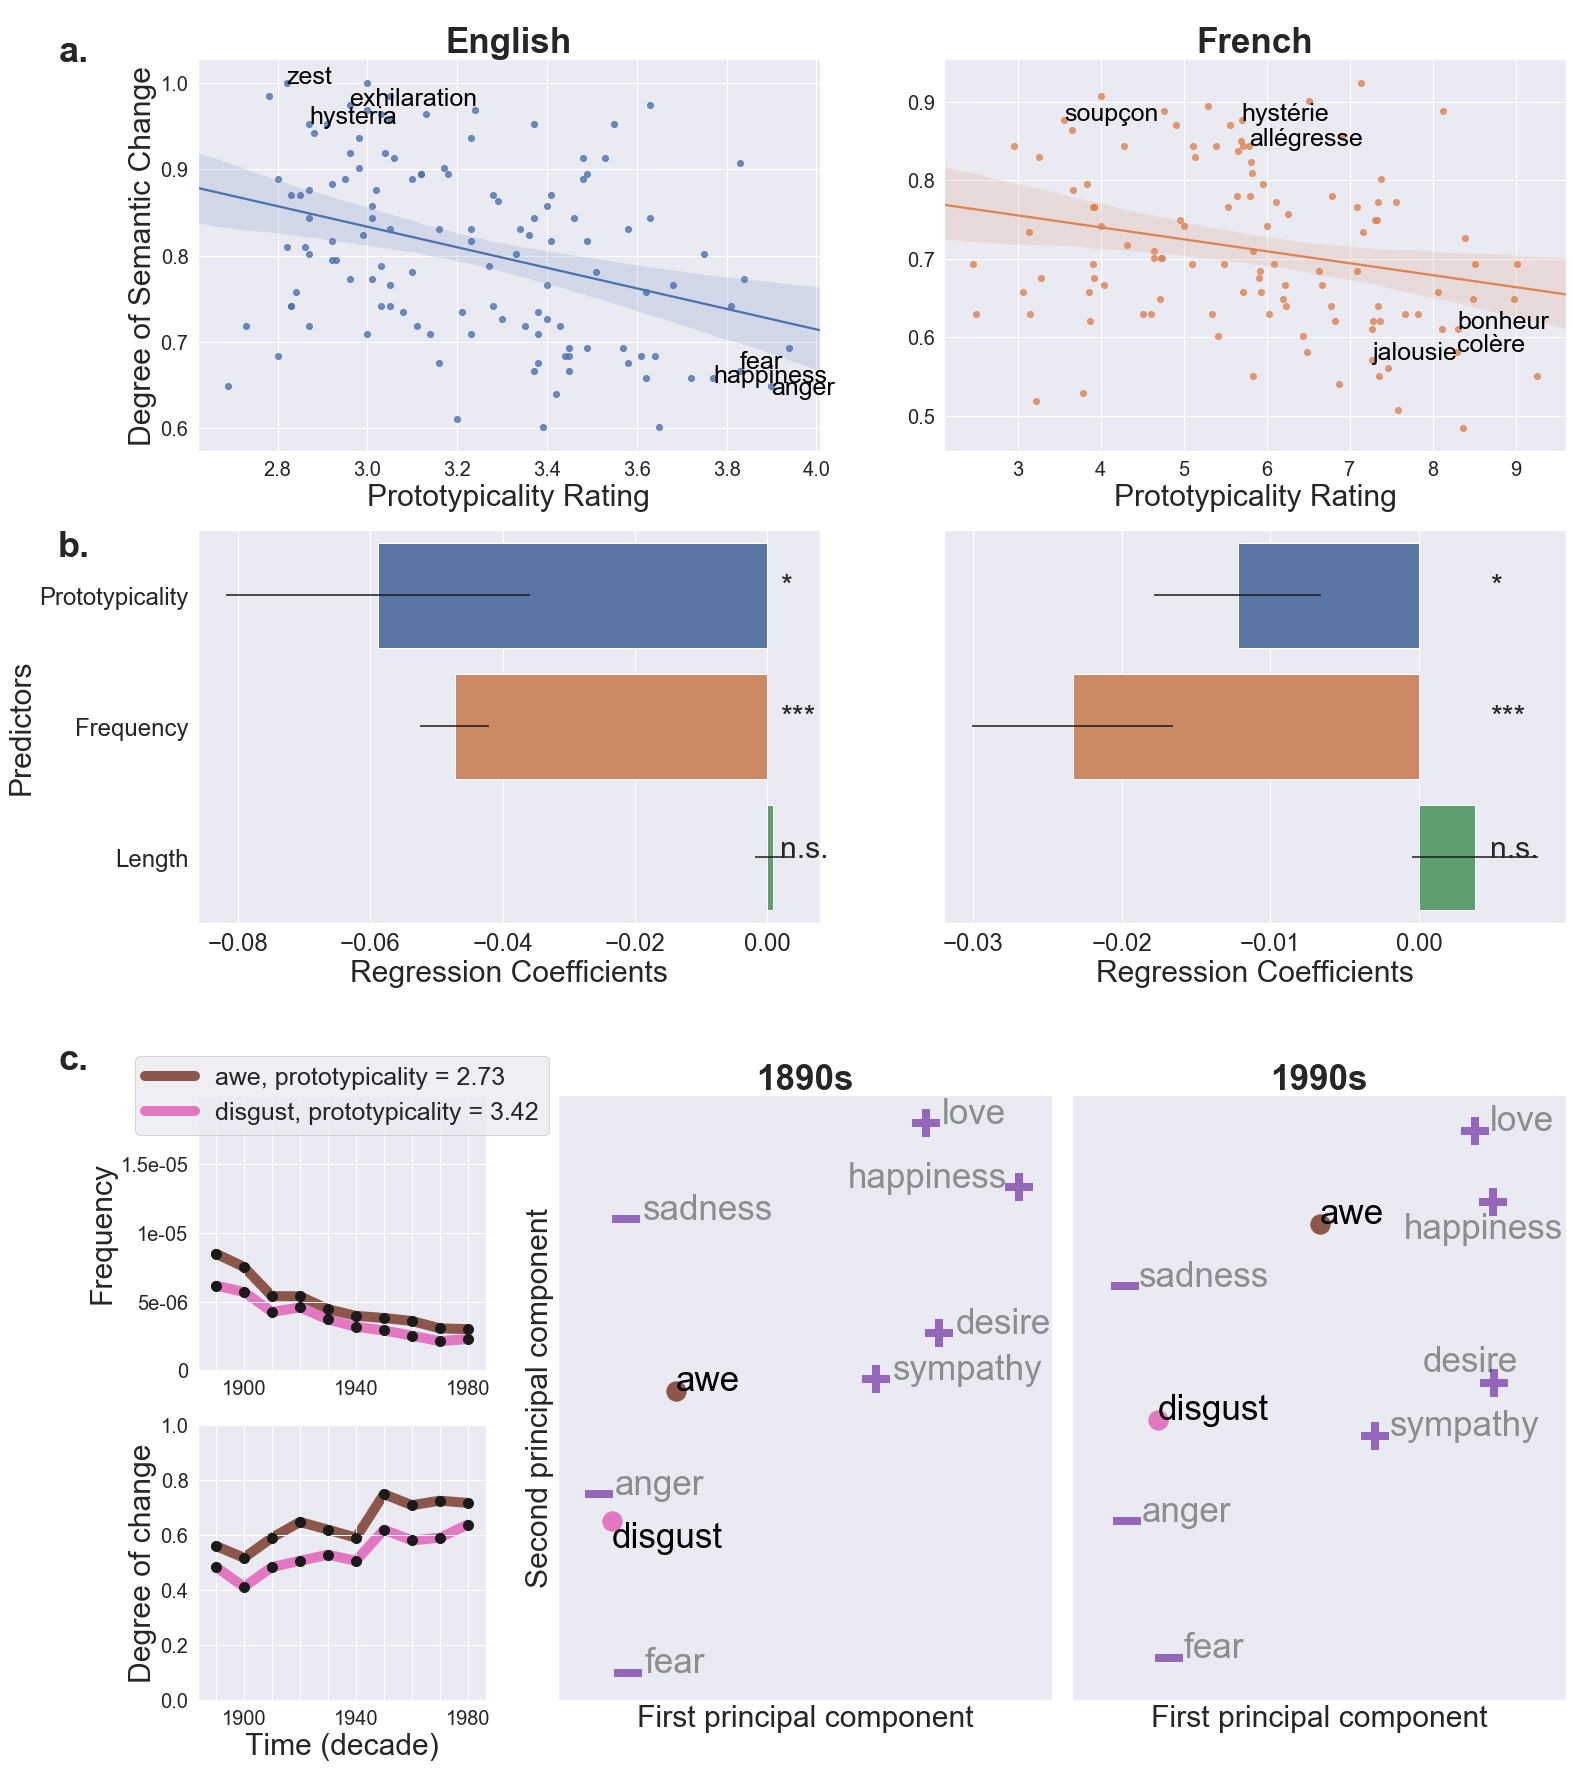

In [5]:
# figure 3
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()
from sklearn.decomposition import PCA

def annotate_scatter(ax, example_words, proto, changes):
    for w in example_words:
        x = proto[w]
        y = changes[w]
        if w == 'anger':
            ax.annotate(w, xy=(x,y), xytext=(x,y-0.01), color='black', fontsize=25)
        elif w == 'happiness':
            ax.annotate(w, xy=(x,y), xytext=(x,y-0.005), color='black', fontsize=25)
        elif w == 'fear':
            ax.annotate(w, xy=(x,y), xytext=(x,y+0.0025), color='black', fontsize=25)
        else:
            ax.annotate(w, xy=(x,y), xytext=(x,y), color='black', fontsize=25)
    return ax

def make_pca_plot(axes, emotion_words, vectors, t1, t2):
    font_size = 35
    linewidth = 8
    anchor_s, example_s = 750, 1500
    anchor_colour = 'tab:purple'
    colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    words_visual_pca = ['anger', 'love', 'fear', 'happiness', 'sadness', 'awe', 'disgust', 'desire', 'sympathy']
    word_marker = {
        'anger': '_',
        'love': '+',
        'fear': '_',
        'happiness': '+',
        'sadness': '_',
        'awe': '.',
        'disgust': '.',
        'desire': '+',
        'sympathy': '+',
    }
    
    ts = [t1, t2]
    vectors_pca = [
        [vectors[w][t1] for w in emotion_words if vectors_filter(w, t1, vectors) and vectors_filter(w, t2, vectors)],
        [vectors[w][t2] for w in emotion_words if vectors_filter(w, t1, vectors) and vectors_filter(w, t2, vectors)]
    ]
    pca = PCA(n_components=2, svd_solver='full')
    pca.fit(vectors_pca[0])
    for i, X in enumerate(vectors_pca):
        ax = axes[i]
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        for j, w in enumerate(words_visual_pca):
            x, y = pca.transform([data[w][ts[i]]])[0]
            if i == 0:
                if w == 'awe':
                    ax.scatter(x, y, zorder=1, label=w, s=example_s, color='tab:brown', marker=word_marker[w])
                    ax.annotate(w, xy=(x,y), xytext=(x,y), color='black', fontsize=font_size, )
                elif w == 'disgust':
                    ax.scatter(x, y, zorder=1, label=w, s=example_s, color='tab:pink', marker=word_marker[w])
                    ax.annotate(w, xy=(x,y-0.025), xytext=(x,y-0.025), color='black', fontsize=font_size, )
                elif w == 'happiness':
                    ax.scatter(x, y, zorder=1, label=w, s=anchor_s, linewidth=linewidth, color=anchor_colour, marker=word_marker[w])
                    ax.annotate(w, xy=(x-0.05,y), xytext=(x-0.26,y), color='black', fontsize=font_size, alpha=0.4)
                else:
                    ax.scatter(x, y, zorder=1, label=w, s=anchor_s, linewidth=linewidth, color=anchor_colour, marker=word_marker[w])
                    ax.annotate(w, xy=(x,y), xytext=(x+0.025,y), color='black', fontsize=font_size, alpha=0.4)
            else:
                if w == 'awe':
                    ax.scatter(x, y, zorder=1, label=w, s=example_s, color='tab:brown', marker=word_marker[w])
                    ax.annotate(w, xy=(x,y), xytext=(x,y), color='black', fontsize=font_size, )
                elif w == 'disgust':
                    ax.scatter(x, y, zorder=1, label=w, s=example_s, color='tab:pink', marker=word_marker[w])
                    ax.annotate(w, xy=(x,y), xytext=(x,y), color='black', fontsize=font_size, )
                elif w == 'happiness':
                    ax.scatter(x, y, zorder=1, label=w, s=anchor_s, linewidth=linewidth, color=anchor_colour, marker=word_marker[w])
                    ax.annotate(w, xy=(x-0.05,y), xytext=(x-0.09,y-0.03), color='black', fontsize=font_size, alpha=0.4)                
                elif w == 'desire':
                    ax.scatter(x, y, zorder=1, label=w, s=anchor_s, linewidth=linewidth, color=anchor_colour, marker=word_marker[w])
                    ax.annotate(w, xy=(x-0.05,y), xytext=(x-0.072,y+0.01), color='black', fontsize=font_size, alpha=0.4)
                else:
                    ax.scatter(x, y, zorder=1, label=w, s=anchor_s, linewidth=linewidth, color=anchor_colour, marker=word_marker[w])
                    ax.annotate(w, xy=(x,y), xytext=(x+0.015,y), color='black', fontsize=font_size, alpha=0.4)                
        if i == 0:
            ax.set_ylabel('Second principal component', fontsize=30)
            ax.set_xlabel('First principal component', fontsize=30)
            ax.set_title('1890s', fontsize=35, weight='bold')
        else:
            ax.set_xlabel('First principal component', fontsize=30)
            ax.set_title('1990s', fontsize=35, weight='bold')
            ax.set_xlim((-0.25,0.25))
            ax.set_ylim((-0.18,0.31))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    return axes

# emotion words
eng_examples = [
    'hysteria', 'zest', 'exhilaration',
    'happiness', 'anger', 'fear',
]
fra_examples = [
    'hystérie', 'allégresse', 'soupçon',
    'bonheur', 'colère', 'jalousie'
]

fig = plt.figure(constrained_layout=False, figsize=(20, 24))
gs1 = fig.add_gridspec(nrows=2, ncols=2, left=0, top=0.95, bottom=0.45, right=0.95)
axes2 = [
    [fig.add_subplot(gs1[0,0]),fig.add_subplot(gs1[0,1])],
    [fig.add_subplot(gs1[1,0]), fig.add_subplot(gs1[1,1])]
]
gs2 = fig.add_gridspec(nrows=2, ncols=1, top=0.35, bottom=0, left=0, right=0.20)
ax5 = fig.add_subplot(gs2[0])
ax6 = fig.add_subplot(gs2[1])
gs3 = fig.add_gridspec(nrows=1, ncols=1, top=0.35, bottom=0, left=0.25, right=0.593)
ax7 = fig.add_subplot(gs3[0])
gs4 = fig.add_gridspec(nrows=1, ncols=1, top=0.35, bottom=0, left=0.607, right=0.95)
ax8 = fig.add_subplot(gs4[0])
axes2[0][0].set_title('English', fontsize=35, weight='bold')
axes2[0][1].set_title('French', fontsize=35, weight='bold')

print('English change vs prototypicality')
axes2[0][0] = plot_change_scatter(axes2[0][0], emotion_eng_words, proto, measures_emotion_eng[100])
axes2[0][0] = annotate_scatter(axes2[0][0], eng_examples, proto, measures_emotion_eng[100])
print('French change vs prototypicality')
axes2[0][1] = plot_change_scatter(axes2[0][1], emotion_fra_words, proto_fr, measures_emotion_fra[100])
axes2[0][1] = annotate_scatter(axes2[0][1], fra_examples, proto_fr, measures_emotion_fra[100])

axes2[1][0] = plot_coefficents(axes2[1][0], result_eng, ['Prototypicality', 'Frequency', 'Length'])
axes2[1][1] = plot_coefficents(axes2[1][1], result_fra, ['Prototypicality', 'Frequency', 'Length'])
axes2[1][1].set_ylabel('')
axes2[1][1].set_yticklabels([])
axes2[0][1].set_ylabel('')

axes2[1][0].annotate('b.',
            xy=(-0.2, 0.69), xytext=(-0.2, 0.7),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes2[0][0].annotate('a.',
            xy=(-0.2, 0.97), xytext=(-0.2, 0.98),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes2[1][0].annotate('c.',
            xy=(-0.2, 0.4), xytext=(-0.2, 0.4),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')

ax7, ax8 = make_pca_plot([ax7, ax8], emotion_words, data, 9, -1)

# trace frequency
time_range = list(range(1890, 1990, 10))
awe_label = 'awe, prototypicality = 2.73'
disgust_label = 'disgust, prototypicality = 3.42'
ax5.plot(time_range, [freqs_all['awe'][t] for t in time_range], linewidth=10, color='tab:brown', label=awe_label, zorder=-1)
ax5.plot(time_range, [freqs_all['disgust'][t] for t in time_range], linewidth=10, color='tab:pink', label=disgust_label, zorder=-1)
ax5.scatter(time_range, [freqs_all['awe'][t] for t in time_range], s=100, color='k', zorder=1)
ax5.scatter(time_range, [freqs_all['disgust'][t] for t in time_range], s=100, color='k', zorder=1)
ax5.set_ylim((0, 0.00002))
ax5.set_xticks(time_range)
ax5.set_xticklabels(['',1900,'','','',1940,'','','',1980], fontsize=20)
ax5.set_yticklabels([0, 0.000005, 0.00001, 0.000015], fontsize=20)
ax5.tick_params(axis='y', labelsize=20)
ax5.set_ylabel('Frequency', fontsize=30)
ax5.legend(prop={'size': 25}, loc="center", bbox_to_anchor=(0.5, 1.))

# trace semantic change
ax6.plot(time_range, example_changes['awe'], linewidth=10, color='tab:brown', zorder=-1)
ax6.plot(time_range, example_changes['disgust'], linewidth=10, color='tab:pink', zorder=-1)
ax6.scatter(time_range, example_changes['awe'], s=100, color='k', zorder=1)
ax6.scatter(time_range, example_changes['disgust'], s=100, color='k', zorder=1)
ax6.set_ylim((0, 1))
ax6.set_xticks(time_range)
ax6.set_xticklabels(['',1900,'','','',1940,'','','',1980], fontsize=20)
ax6.set_xlabel('Time (decade)', fontsize=30)
ax6.tick_params(axis='y', labelsize=20)
ax6.set_ylabel('Degree of change', fontsize=30)

img_format = 'svg'
plt.savefig('images/figure3.'+img_format, format=img_format, bbox_inches='tight')
